# Implementation of multiple regression for HOME PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('homeprices.csv')

In [28]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [29]:
df.isnull().values.any()

True

In [30]:
df[2:3]

,area,bedrooms,age,price
2,3200,NaN,18,610000


In [31]:
df=df.fillna(method='ffill')

In [32]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Deciding Input & Output Variables

In [35]:
X = df.loc[:,['area','bedrooms','age']]

In [36]:
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [37]:
X.ndim

2

In [38]:
y= df.price

In [39]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

### Split the data

In [40]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [59]:
X_train

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30


### Build the model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
mrmodel = LinearRegression()

In [62]:
mrmodel

LinearRegression()

### Model Fitting/training

In [63]:
mrmodel.fit(X_train,y_train)

LinearRegression()

In [64]:
m = mrmodel.coef_

In [65]:
m

array([-3.15e+02,  3.21e+05,  3.60e+04])

In [66]:
c = mrmodel.intercept_

In [67]:
c

-314000.00000000163

In [70]:
y_pred = mrmodel.predict(X_test)
y_pred

array([319000., 608500.])

### ACCURACY CHECK

In [68]:
#Traning Accuracy
mrmodel.score(X_train,y_train)*100

100.0

In [72]:
mrmodel.score(X_test,y_test)*100

-18706.660000000025

In [71]:
mrmodel.score(X_test,y_pred)*100

100.0

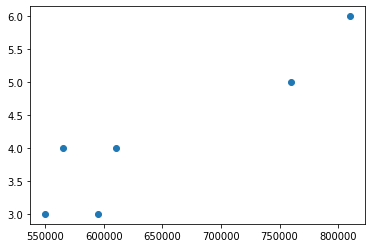

In [82]:
plt.scatter(y,df.bedrooms)

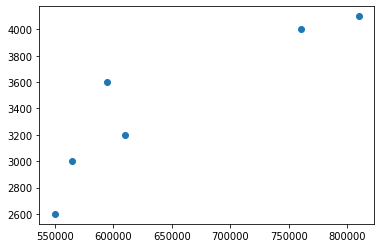

In [83]:
plt.scatter(y,df.area)

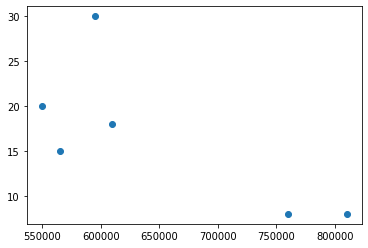

In [84]:
plt.scatter(y,df.age)